In [67]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier, LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
print(sklearn.__version__)
from pprint import pprint# 줄 간 깔끔하게
import matplotlib.pyplot as plt
import seaborn as sns

1.3.0


In [68]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [69]:
# (2) 데이터 준비
# load_digits 메서드를 사용합니다.
# 
# (3) 데이터 이해하기
# 지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.
# 
# Feature Data 지정하기
# Label Data 지정하기asdasdas
# Target Names 출력해 보기
# 데이터 Describe 해 보기
# (4) train, test 데이터 분리
# 모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
# X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.
# 
# (5) 다양한 모델로 학습시켜보기
# 학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?
# 
# Decision Tree 사용해 보기
# Random Forest 사용해 보기
# SVM 사용해 보기
# SGD Classifier 사용해 보기
# Logistic Regression 사용해 보기
# (6) 모델을 평가해 보기
# 학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

In [70]:
a=load_digits().keys()  # 구조를 잘 모르겠다. load형 데이터가 Dict 형태로 되어있어서 , 
print(type(a))
b=load_digits().DESCR # key값에 해당하는 str (Value의 형태로서 str)을 불러오는 방식
print(type(b))
b
pprint(b)


<class 'dict_keys'>
<class 'str'>
('.. _digits_dataset:\n'
 '\n'
 'Optical recognition of handwritten digits dataset\n'
 '--------------------------------------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 1797\n'
 '    :Number of Attributes: 64\n'
 '    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n'
 '    :Missing Attribute Values: None\n'
 "    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n"
 '    :Date: July; 1998\n'
 '\n'
 'This is a copy of the test set of the UCI ML hand-written digits datasets\n'
 'https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n'
 '\n'
 'The data set contains images of hand-written digits: 10 classes where\n'
 'each class refers to a digit.\n'
 '\n'
 'Preprocessing programs made available by NIST were used to extract\n'
 'normalized bitmaps of handwritten digits from a preprinted form. From a\n'
 'total of 43 people, 30 contributed to the training set

In [71]:
digit = load_digits()

In [63]:
digit_data = digit.data

<Axes: ylabel='count'>

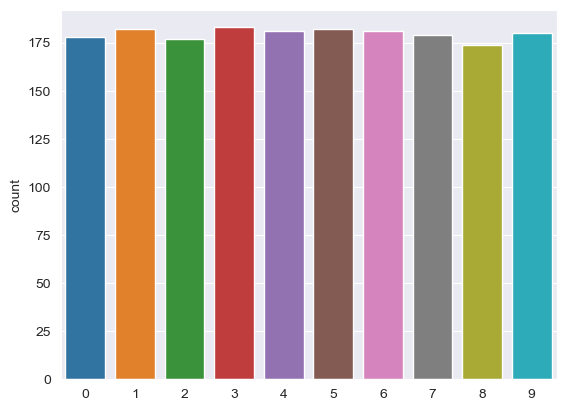

In [76]:
digit_label = digit.target


a = digit_label
b = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sns.countplot(x=digit_label)


In [56]:
digit.feature_names
print(type(digit.feature_names[0]))
print(digit.feature_names)

<class 'str'>
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [57]:
df_digit = pd.DataFrame(data=digit_data , columns=digit.feature_names) # pixel에 콤마가 찍혀있어서 digit.feature_names

In [58]:
print(df_digit.describe())

       pixel_0_0    pixel_0_1    pixel_0_2    pixel_0_3    pixel_0_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         pixel_0_5    pixel_0_6    pixel_0_7    pixel_1_0    pixel_1_1  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000    

In [113]:
idx = int(32)
X_train, X_test , y_train, y_test = train_test_split(digit_data,digit_label,test_size=0.2,random_state=idx)


In [40]:
# (5) 다양한 모델로 학습시켜보기
# Decision Tree 사용해 보기
dt = DecisionTreeClassifier(random_state=idx)
dt.fit(X_train, y_train)
# Random Forest 사용해 보기
rf = RandomForestClassifier(random_state=idx)
rf.fit(X_train, y_train)

# SVM 사용해 보기
svm_model = svm.SVC(random_state=idx)
svm_model.fit(X_train, y_train)

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(random_state=idx)
sgd_model.fit(X_train, y_train)

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=4000,random_state=idx)
logistic_model.fit(X_train, y_train)

models = [dt,rf,svm_model,sgd_model,logistic_model]

In [41]:

accu = []
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    print(model,classification_report(y_test,y_pred))
    accu.append(( (y_pred == y_test).mean()))
    print(confusion_matrix(y_test, y_pred))



DecisionTreeClassifier(random_state=10)               precision    recall  f1-score   support

           0       0.73      0.92      0.82        39
           1       0.95      0.83      0.89        75

    accuracy                           0.86       114
   macro avg       0.84      0.87      0.85       114
weighted avg       0.88      0.86      0.86       114

[[36  3]
 [13 62]]
RandomForestClassifier(random_state=10)               precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

[[39  0]
 [ 2 73]]
SVC(random_state=10)               precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.91      0.97      0.94        75

    accuracy                           0.92

In [42]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [86]:
load_wine().keys()
wine = load_wine()
wine_data = wine.data
wine_label = wine.target
wine.feature_names
print(type(wine.feature_names[0]))
print(wine.feature_names)
df_wine = pd.DataFrame(data=wine_data, columns=wine.feature_names)  # 
print(df_wine.describe())
idx = int(16)
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=idx)

# (5) 다양한 모델로 학습시켜보기
# Decision Tree 사용해 보기
dt = DecisionTreeClassifier(random_state=idx)
dt.fit(X_train, y_train)
# Random Forest 사용해 보기
rf = RandomForestClassifier(random_state=idx)
rf.fit(X_train, y_train)

# SVM 사용해 보기
svm_model = svm.SVC(random_state=idx)
svm_model.fit(X_train, y_train)

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(random_state=idx)
sgd_model.fit(X_train, y_train)

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=4000, random_state=idx)
logistic_model.fit(X_train, y_train)

models = [dt, rf, svm_model, sgd_model, logistic_model]

accu = []
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    accu.append((y_pred == y_test).mean())

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))# Iterraion 기본값 100인데 이렇게 했을 때, 2100번값 이상 정도의 큰 값이면 
print(accu)


<class 'str'>
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.00

In [85]:
load_wine().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [112]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_wine
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# 
# wine = load_wine()
# wine_data = wine.data
# wine_label = wine.target
# 
# max_iterations = 1000  # 최대 시도 횟수 설정
# accuracy_threshold = 1.0  # 원하는 정확도
# 
# for i in range(max_iterations):
#     # 데이터를 나눕니다.
#     X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=32)
# 
#     # 랜덤 포레스트 모델 학습
#     rf = RandomForestClassifier()
#     rf.fit(X_train, y_train)
# 
#     # 정확도 측정
#     y_pred = rf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
# 
#     print(f"Iteration {i + 1}: Accuracy = {accuracy}")
# 
#     if accuracy == accuracy_threshold:
#         print("Achieved 100% accuracy!")
#         break

Iteration 1: Accuracy = 0.9444444444444444
Iteration 2: Accuracy = 0.9722222222222222
Iteration 3: Accuracy = 0.9722222222222222
Iteration 4: Accuracy = 0.9722222222222222
Iteration 5: Accuracy = 0.9722222222222222
Iteration 6: Accuracy = 0.9722222222222222
Iteration 7: Accuracy = 0.9722222222222222
Iteration 8: Accuracy = 0.9722222222222222
Iteration 9: Accuracy = 0.9722222222222222
Iteration 10: Accuracy = 0.9722222222222222
Iteration 11: Accuracy = 0.9444444444444444
Iteration 12: Accuracy = 0.9444444444444444
Iteration 13: Accuracy = 0.9722222222222222
Iteration 14: Accuracy = 0.9722222222222222
Iteration 15: Accuracy = 0.9722222222222222
Iteration 16: Accuracy = 0.9722222222222222
Iteration 17: Accuracy = 0.9722222222222222
Iteration 18: Accuracy = 0.9722222222222222
Iteration 19: Accuracy = 0.9722222222222222
Iteration 20: Accuracy = 0.9722222222222222
Iteration 21: Accuracy = 0.9722222222222222
Iteration 22: Accuracy = 0.9444444444444444
Iteration 23: Accuracy = 0.97222222222222

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:

cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_label = cancer.target
cancer.feature_names
print(type(cancer.feature_names[0]))
print(cancer.feature_names)
df_cancer = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)  # 
print(df_cancer.describe())
idx = int(10)
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size=0.2, random_state=idx)

# (5) 다양한 모델로 학습시켜보기
# Decision Tree 사용해 보기
dt = DecisionTreeClassifier(random_state=idx)
dt.fit(X_train, y_train)
# Random Forest 사용해 보기
rf = RandomForestClassifier(random_state=idx)
rf.fit(X_train, y_train)

# SVM 사용해 보기
svm_model = svm.SVC(random_state=idx)
svm_model.fit(X_train, y_train)

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(random_state=idx)
sgd_model.fit(X_train, y_train)

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=4000, random_state=idx)
logistic_model.fit(X_train, y_train)

models = [dt, rf, svm_model, sgd_model, logistic_model]

accu = []
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    accu.append(((y_pred == y_test).mean()))
    print(confusion_matrix(y_test, y_pred))
    print(model, classification_report(y_test, y_pred, zero_division=1))

<class 'numpy.str_'>
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000  

물론입니다! 아래는 마크다운 형식으로 정리한 내용입니다.

---

## 모델 선택과 근거

### 1. Logistic Regression
- **근거**:
  - 로지스틱 회귀는 분류 문제에서 기본적으로 사용되는 선형 분류기 중 하나입니다.
  - 데이터에 대한 간단한 인사이트를 얻을 수 있습니다.
  - 튜닝할 파라미터가 상대적으로 적어 빠르게 결과를 얻을 수 있습니다.

### 2. Decision Tree
- **근거**:
  - 결정 트리는 데이터의 비선형 관계를 잘 표현할 수 있습니다.
  - 결과를 시각화해서 이해하기 쉽습니다.
  - 특성 중요도를 확인할 수 있어 데이터에 대한 인사이트 제공에 도움이 됩니다.

### 3. Random Forest
- **근거**:
  - 랜덤 포레스트는 결정 트리의 앙상블 버전입니다.
  - 오버피팅 문제를 줄이고 일반화 성능을 향상시킬 수 있습니다.
  - 결정 트리보다 튜닝할 파라미터가 더 많지만, 대부분의 경우 더 나은 성능을 보입니다.

### 4. SVM (Support Vector Machine)
- **근거**:
  - SVM은 선형 및 비선형 분류에 모두 사용될 수 있습니다.
  - 여러 커널 트릭을 사용하여 데이터의 복잡한 패턴을 학습할 수 있습니다.
  - SVM은 특히 높은 차원의 데이터에서 잘 작동하며, 분리 경계 주변의 데이터 포인트에 민감합니다.

### 5. SGD Classifier
- **근거**:
  - SGD(Stochastic Gradient Descent) 분류기는 큰 데이터셋에서 빠르게 결과를 얻기 위해 사용됩니다.
  - 로지스틱 회귀나 SVM의 대안으로 사용될 수 있지만, 학습률 및 정규화와 같은 튜닝이 필요한 파라미터가 있습니다.

---





--

## 평가 지표

### 1. Accuracy (정확도)
- **정의**: 전체 예측 중 올바른 예측의 비율을 나타냅니다.
- **적용 상황**: 다중 클래스 분류 문제에서 각 클래스의 표본 수가 균등할 때 주로 사용됩니다. - 
- #### 확인해보자
### OUT76 확인바람

- **특징**: 손글씨 인식과 같은 상황에서 각 클래스(숫자)가 균등하게 나타날 확률이 있을 때, 정확도는 가장 직관적인 성능 평가 지표가 될 수 있습니다.
#와인 accuracy[0.8333333333333334, 0.9722222222222222, 0.5, 0.5833333333333334, 0.9166666666666666] 위의 평가 모델 순
- 의사결정 나무와 SGD 분류기의 정확도가 높게 나옴.
 - wine 분류에서는 
### 2. Confusion Matrix (혼동 행렬)
- **정의**: 실제 클래스와 예측 클래스 간의 관계를 표로 나타낸 것입니다.
- **적용 상황**: 모델의 세부 성능을 분석할 필요가 있을 때 사용됩니다.
- **특징**: 특정 클래스가
 - 다른 클래스로 얼마나 잘못 분류되는지, 어떤 클래스들이 주로 혼동되는지 등의 정보를 제공합니다.

### 3. F1 Score, Precision, Recall
- **정의**: 
  - **Precision**: True Positive를 Positive로 예측한 총 수로 나눈 값.
  - **Recall**: True Positive를 실제 Positive의 총 수로 나눈 값.
  - **F1 Score**: Precision과 Recall의 조화 평균.
- **적용 상황**: 클래스 간 불균형이 존재하거나, 특정 클래스의 성능에 더 중점을 둘 필요가 있을 때 사용됩니다.
- **특징**: 높은 Precision은 False Positive가 낮다는 것을 의미하며, 높은 Recall은 False Negative가 낮다는 것을 의미합니다. F1 Score는 이 두 지표의 균형을 나타내므로, 한쪽으로 치우치지 않는 성능을 나타내기 위해 사용됩니다.

---
